## Wine Quality 

These datasets are available from the [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/wine+quality), and are a paper of [Cortez et al., 2009] called **Modeling wine preferences by data mining from physicochemical properties.** 

**Business Problemn**: The objective is to classify wine quality from two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.). Physicochemical laboratory tests routinely used to characterize wine include determination of density, alcohol or pH values, while sensory tests rely mainly on human experts. 

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

Input variables (based on physicochemical tests):
1.   **fixed acidity** : most acids involved with wine or fixed or nonvolatile (do not evaporate readily);
2.   **volatile acidity** : the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste;
3.   **citric acid** : found in small quantities, citric acid can add 'freshness' and flavor to wines;
4.   **residual suga** : the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet;
5.   **chlorides** : the amount of salt in the wine;
6.   **free sulfur dioxide** : the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine;
7.   **total sulfur dioxide** : amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.
8.   **density** : the density of water is close to that of water depending on the percent alcohol and sugar content;
9.   **pH** : describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale;
10.   **sulphates** : a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant;
11.   **alcohol** : the percent alcohol content of the wine.

Output variable (based on sensory data):
1.   **quality** : score between 0 and 10 given by human wine tasters.


My objective is to improve the model proposed by [Cortez et al., 2009], using SVM classifier, Neural Network, XGBClassifier or Random Forest Classifier.
For this in the next cells I exploring datasets white and red, creating visualizations and training models.


Let's get started. 

Import some librarys . . .

In [0]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib

from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix 

import tensorflow as tf

from xgboost import XGBClassifier, plot_importance

from sklearn.ensemble import RandomForestClassifier

**Function plot Learning curves**: Used to verified bias and variance of model, and identified overfitting or underfitting.

In [0]:
def plotLearningCurves(history):
    # list all data in history
    keys = list(history.history.keys())
    # summarize history for accuracy
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history[keys[1]])
    plt.plot(history.history[keys[3]])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
   
    
    # summarize history for loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history[keys[0]])
    plt.plot(history.history[keys[2]])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    
    plt.tight_layout()
    
    plt.show()

Reading datasets directly of the UCI portal.

In [0]:
red_uci = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
white_uci = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

In [0]:
data_red = pd.read_csv(red_uci, sep=';')
data_white = pd.read_csv(white_uci, sep=';')

In [6]:
data_red.head()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]

In [7]:
data_white.head()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9        6

[5 rows x 12 columns]

**Exploratory data analysis**: The 11 features are all numeric and don't have Nan values. However, they have some very different scales, so let's make a mental note to standardize the data later.

In [8]:
data_red.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     5.636023
std         1.741096          0.179060  ...     1.065668     0.807569
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.200000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]

In [9]:
data_white.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    4898.000000       4898.000000  ...  4898.000000  4898.000000
mean        6.854788          0.278241  ...    10.514267     5.877909
std         0.843868          0.100795  ...     1.230621     0.885639
min         3.800000          0.080000  ...     8.000000     3.000000
25%         6.300000          0.210000  ...     9.500000     5.000000
50%         6.800000          0.260000  ...    10.400000     6.000000
75%         7.300000          0.320000  ...    11.400000     6.000000
max        14.200000          1.100000  ...    14.200000     9.000000

[8 rows x 12 columns]

Here, I plotting heatmap of correlation between all features in each dataset. With that we can check which features best correlate with variable 'quality'.

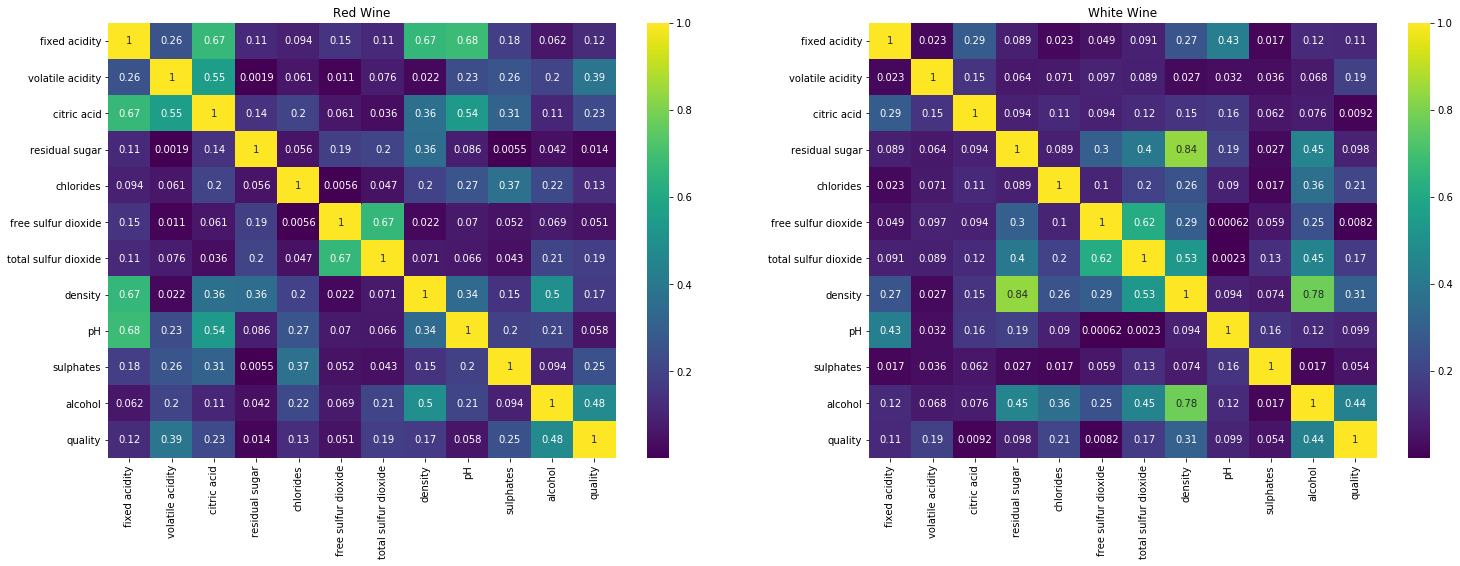

In [10]:
plt.figure(figsize=(25,8))
plt.subplot(1, 2, 1)
plt.title('Red Wine')
sns.heatmap(data_red.corr().abs(), linecolor='white', annot=True, cmap='viridis')

plt.subplot(1, 2, 2)
plt.title('White Wine')
sns.heatmap(data_white.corr().abs(), linecolor='white', annot=True, cmap='viridis')

### Outliers

With a pairplot, I will check for outliers in datasets and remove them. In some variables, the removal of outliers decreasing the accuracy of the algorithm. I did the unit test of each variable and commented the line of those that the outliers cannot be removed.

How good was that?
   In the XBGClassifier model with Red Wine data, the accuracy increased from 0.68 to 0.75. For White Wine, the accuracy increased from 0.68 to 0.70. Especially for Red Wine the difference was excellent.

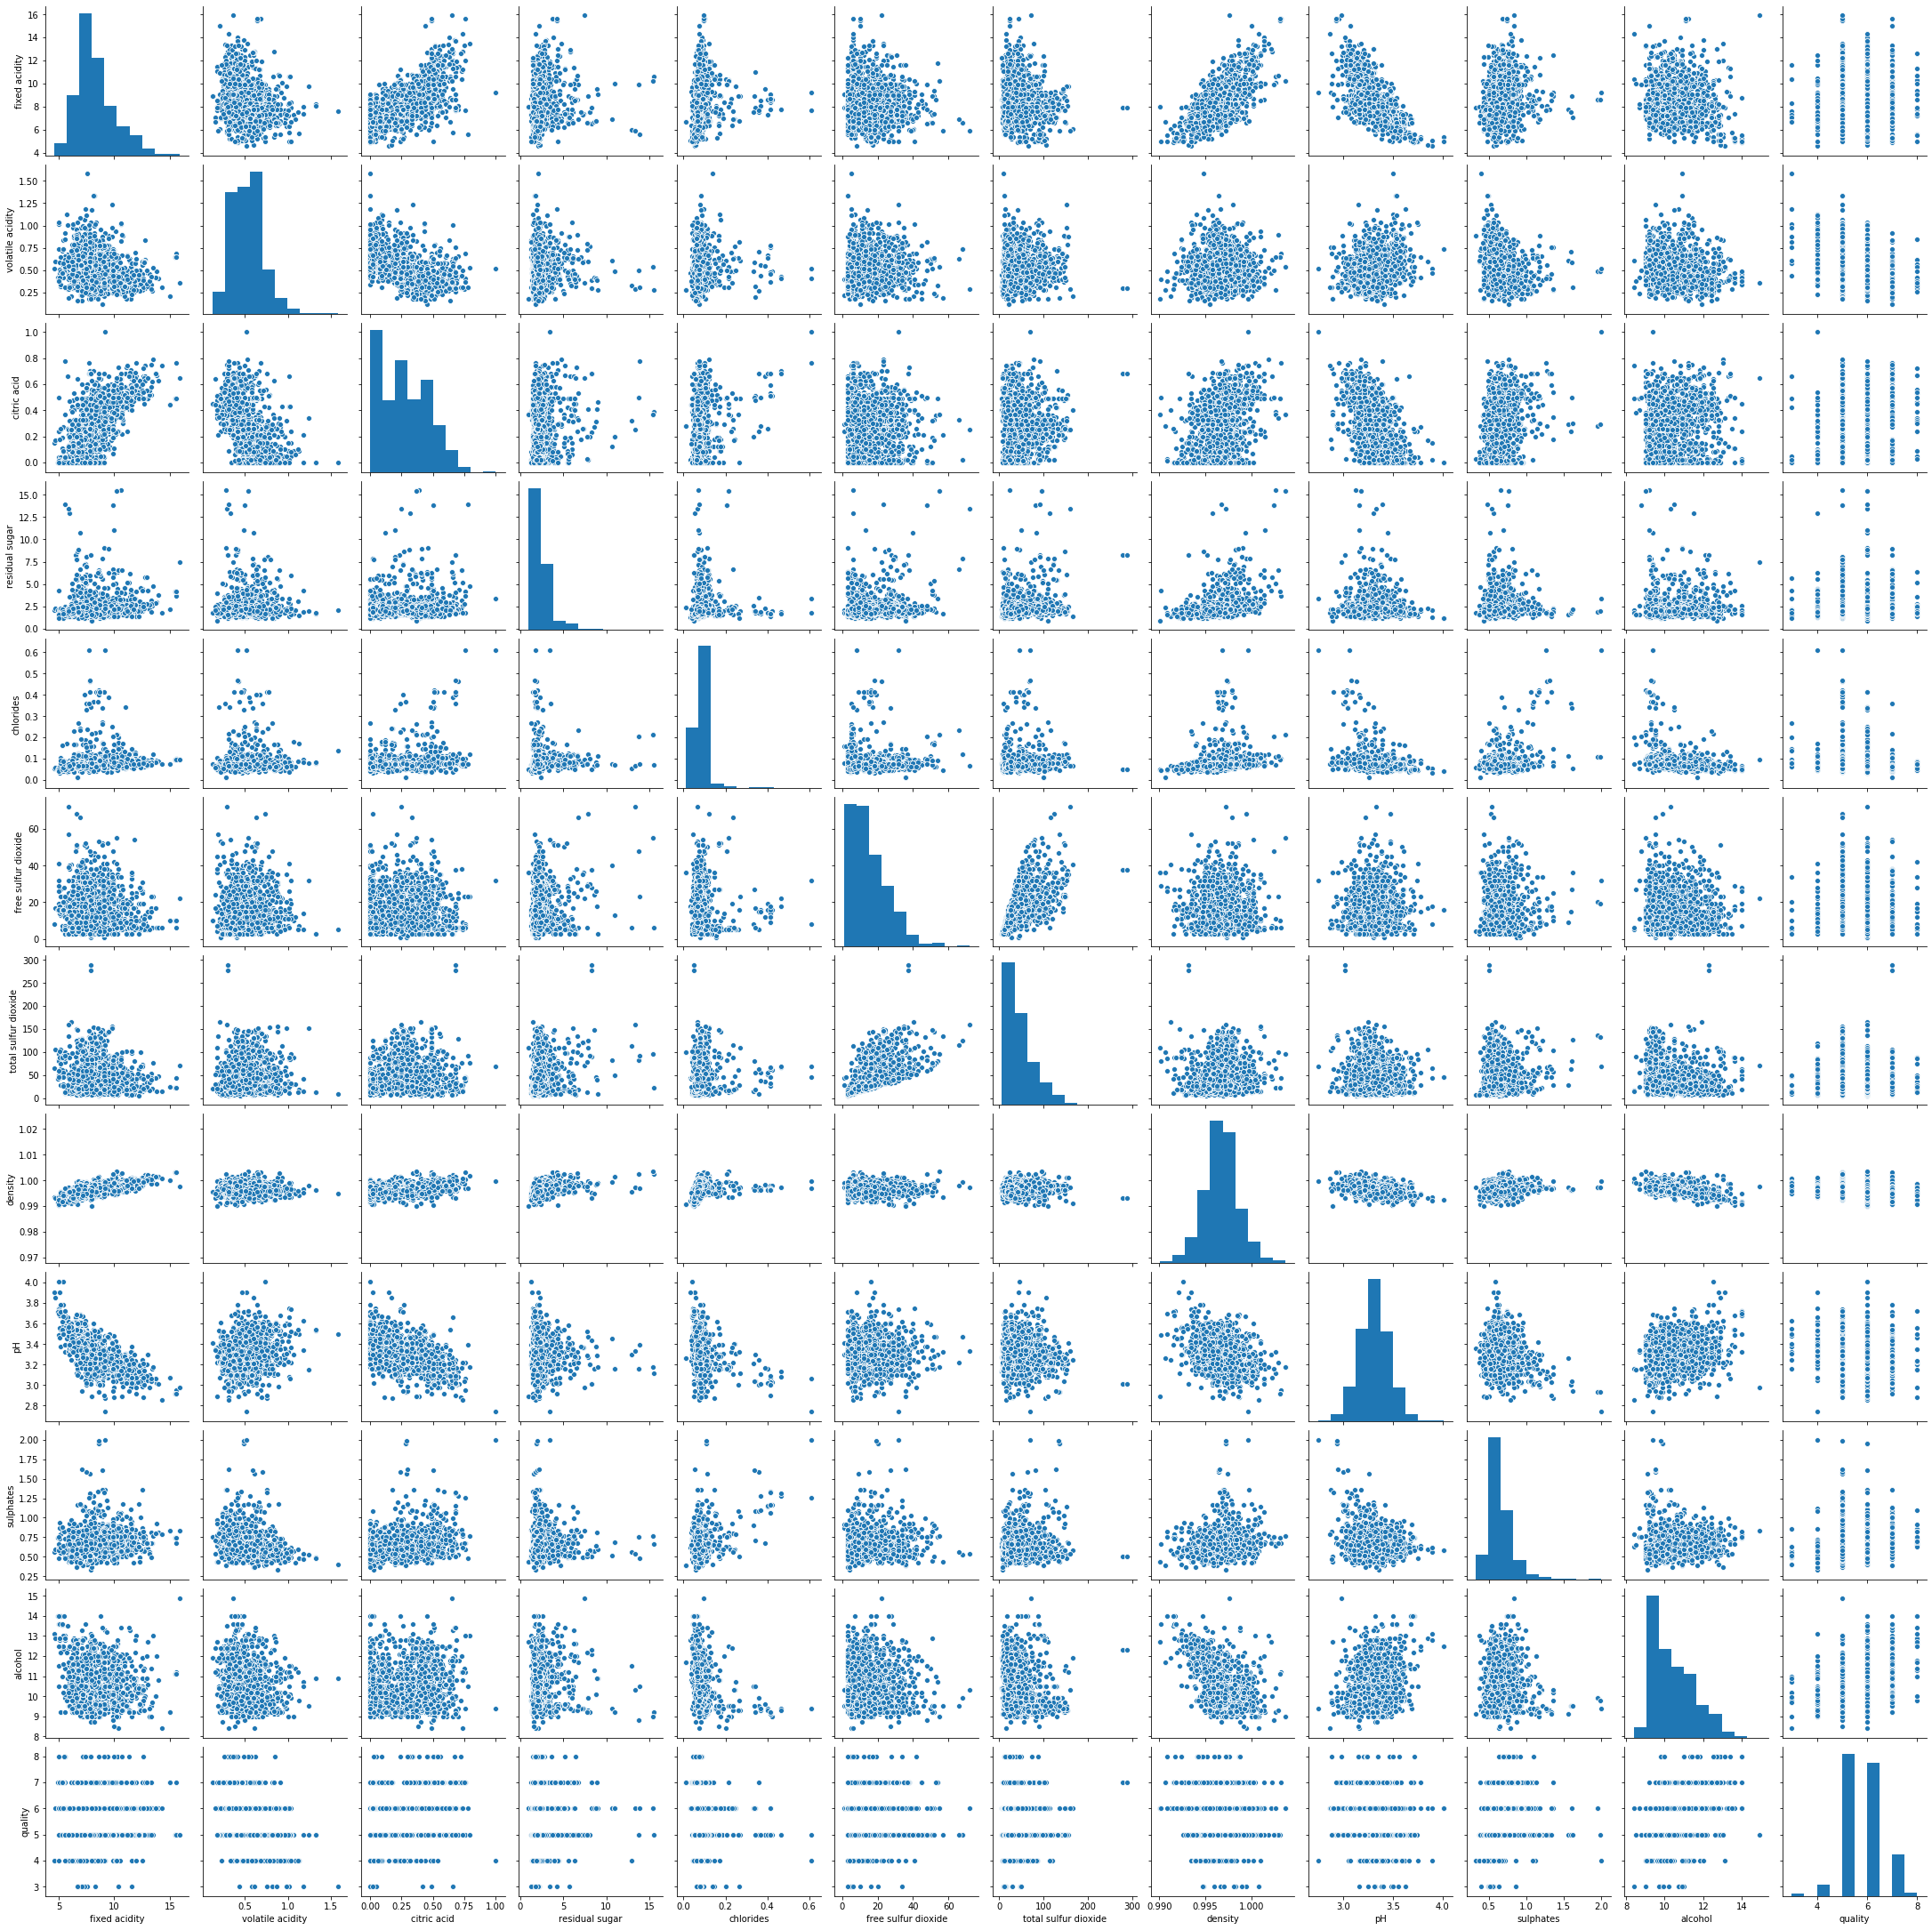

In [11]:
sns.pairplot(data_red)

In [0]:
data_red.drop(data_red[(data_red['fixed acidity'] > 14)].index, inplace=True)
data_red.drop(data_red[(data_red['volatile acidity'] > 1.25)].index, inplace=True)
#data_red.drop(data_red[(data_red['citric acid'] > 0.82)].index, inplace=True)
#data_red.drop(data_red[(data_red['residual sugar'] > 10)].index, inplace=True)
data_red.drop(data_red[(data_red['chlorides'] > 0.5)].index, inplace=True)
data_red.drop(data_red[(data_red['free sulfur dioxide'] > 60)].index, inplace=True)
#data_red.drop(data_red[(data_red['total sulfur dioxide'] > 200)].index, inplace=True)
data_red.drop(data_red[(data_red['pH'] > 3.8) |  (data_red['pH'] < 2.8)].index, inplace=True)
data_red.drop(data_red[(data_red['sulphates'] > 1.5)].index, inplace=True)
#data_red.drop(data_red[(data_red['alcohol'] > 14)].index, inplace=True)

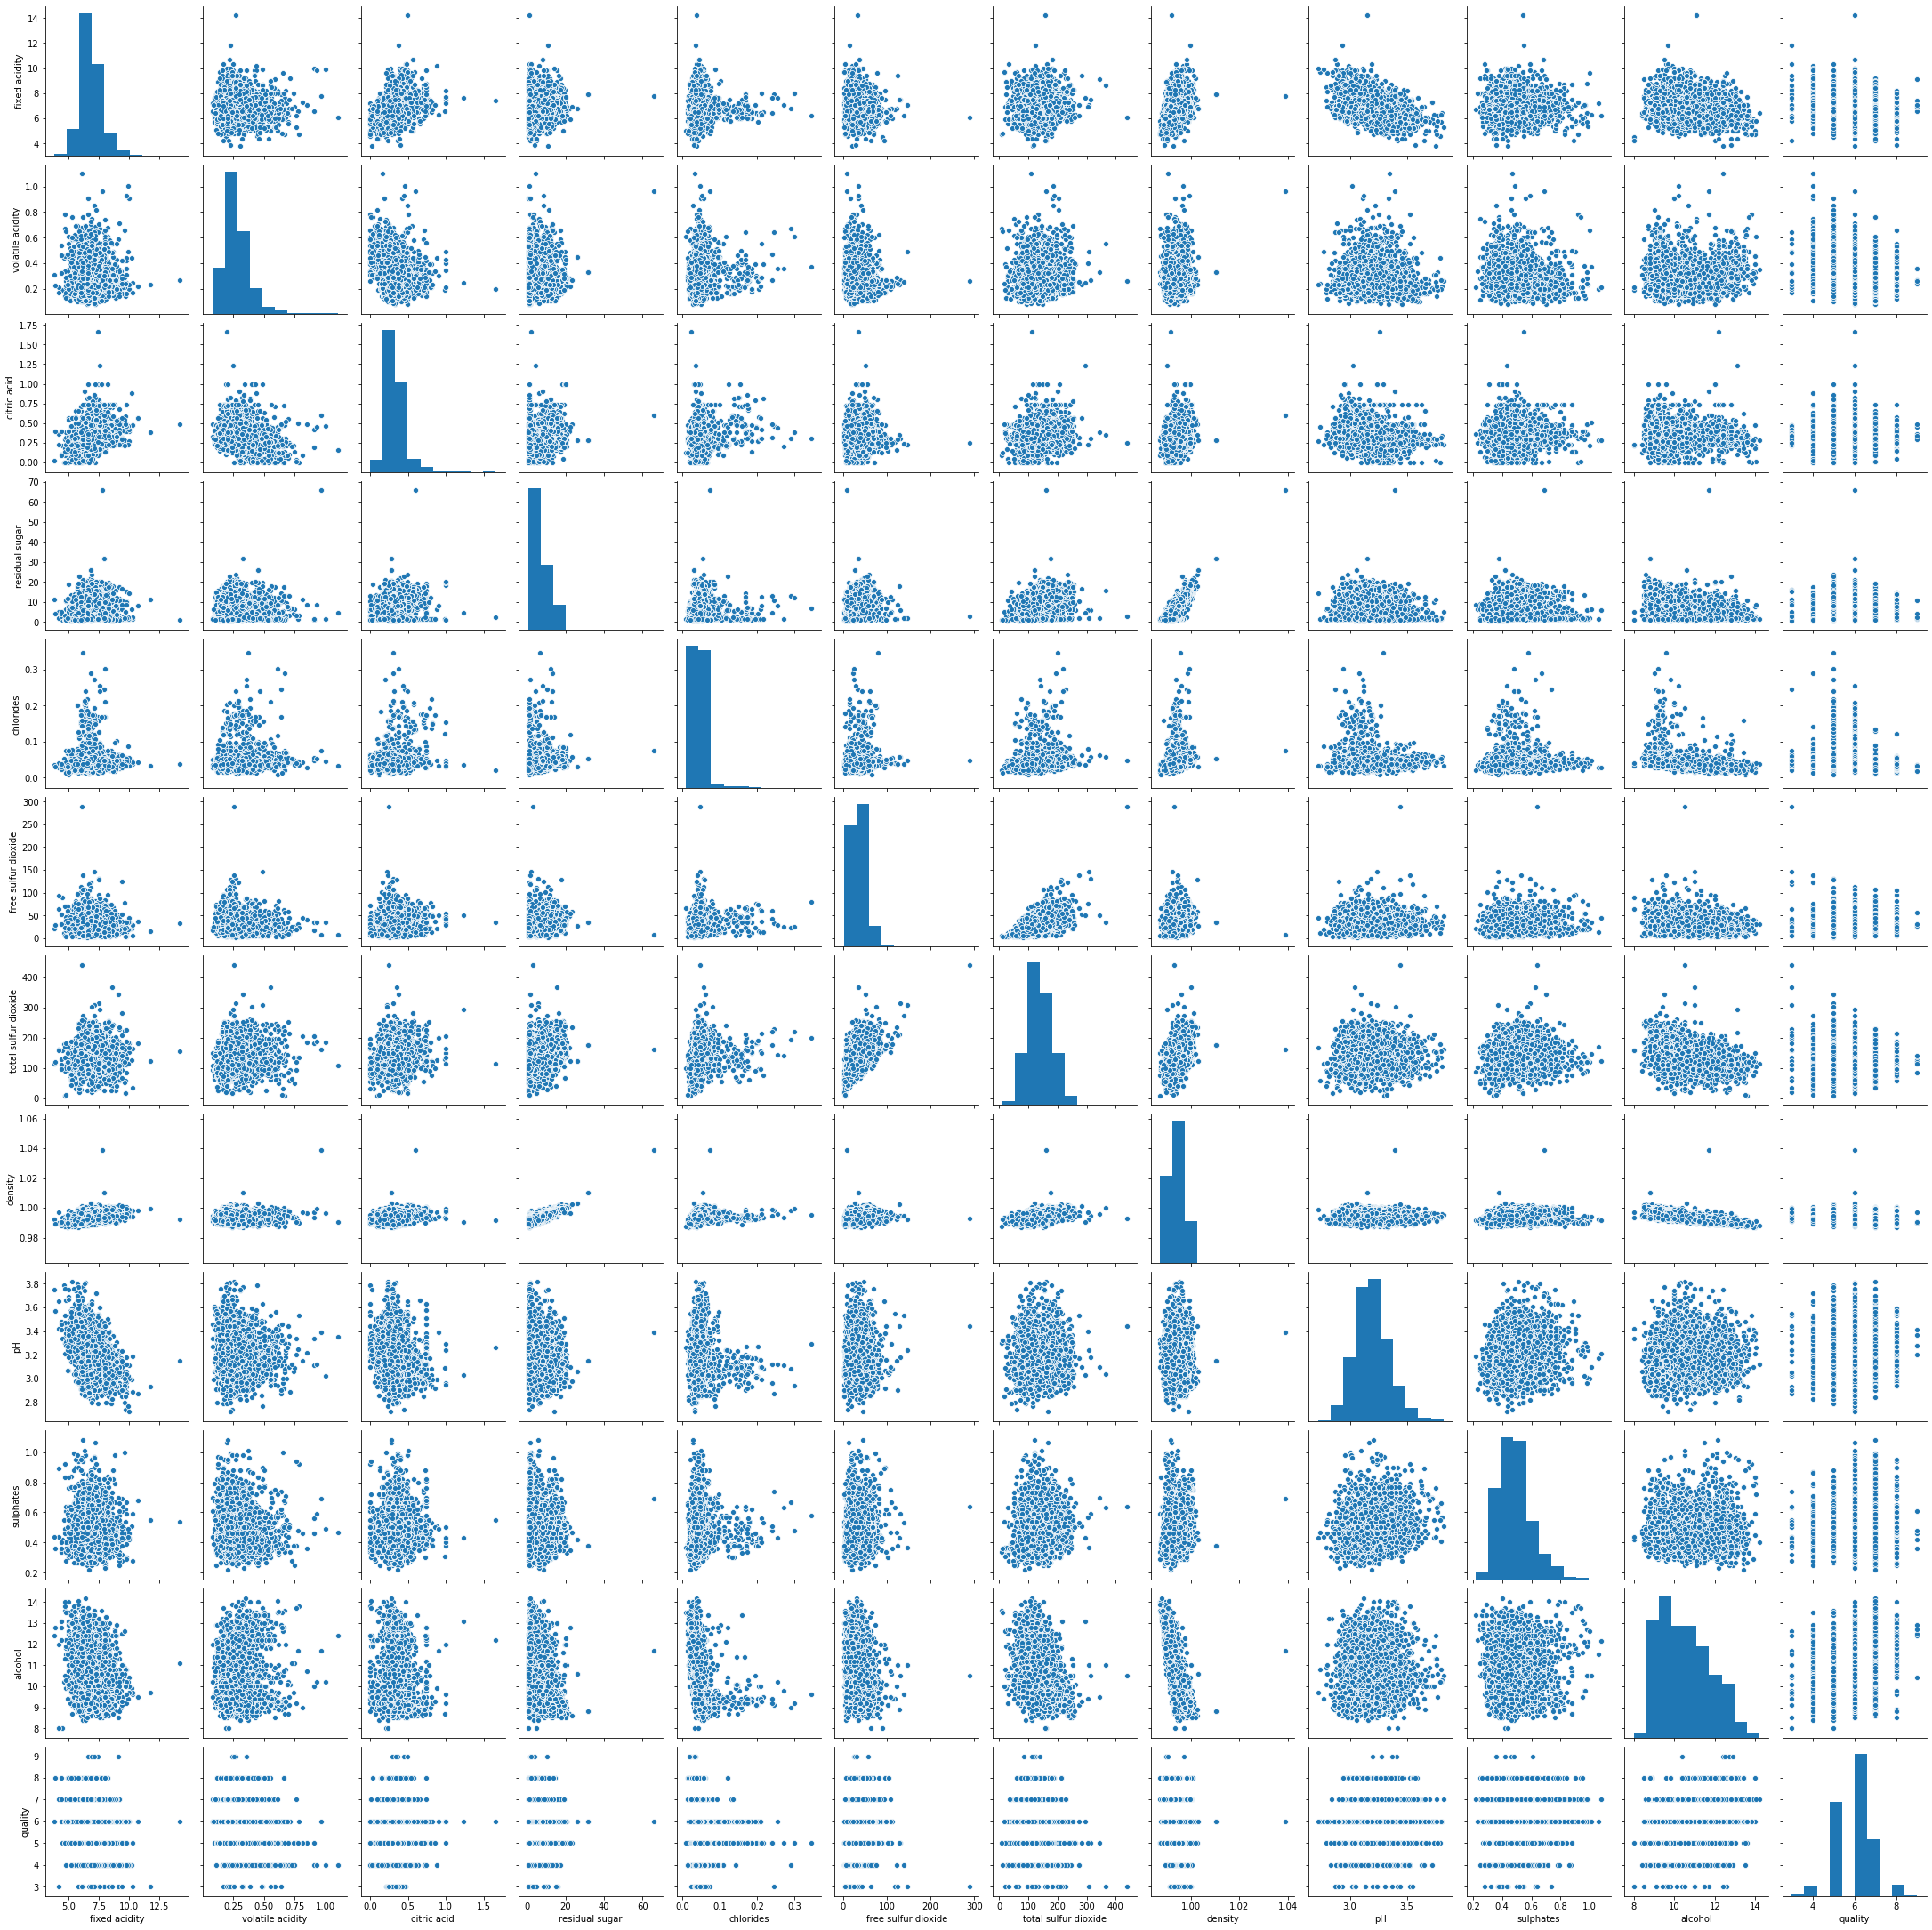

In [13]:
sns.pairplot(data_white)

In [0]:
data_white.drop(data_white[(data_white['fixed acidity'] > 10.5)].index, inplace=True)
#data_white.drop(data_white[(data_white['volatile acidity'] > 1.0)].index, inplace=True)
#data_white.drop(data_white[(data_white['citric acid'] > 1.1)].index, inplace=True)
data_white.drop(data_white[(data_white['residual sugar'] > 30)].index, inplace=True)
data_white.drop(data_white[(data_white['chlorides'] > 0.2)].index, inplace=True)
data_white.drop(data_white[(data_white['free sulfur dioxide'] > 100)].index, inplace=True)
#data_white.drop(data_white[(data_white['total sulfur dioxide'] > 270)].index, inplace=True)
#data_white.drop(data_white[(data_white['density'] > 1.005)].index, inplace=True)
data_white.drop(data_white[(data_white['pH'] < 2.75)].index, inplace=True)
data_white.drop(data_white[(data_white['sulphates'] > 1.0)].index, inplace=True)
data_white.drop(data_white[(data_white['alcohol'] < 8.2)].index, inplace=True)

### Exploratory Analysis

Plotting some graphs to analyze the correlation between features.

In the first graph there is the positive correlation between "residual sugar" and "density". Although some outliers are clear, their removal impact the accuracy of the model.

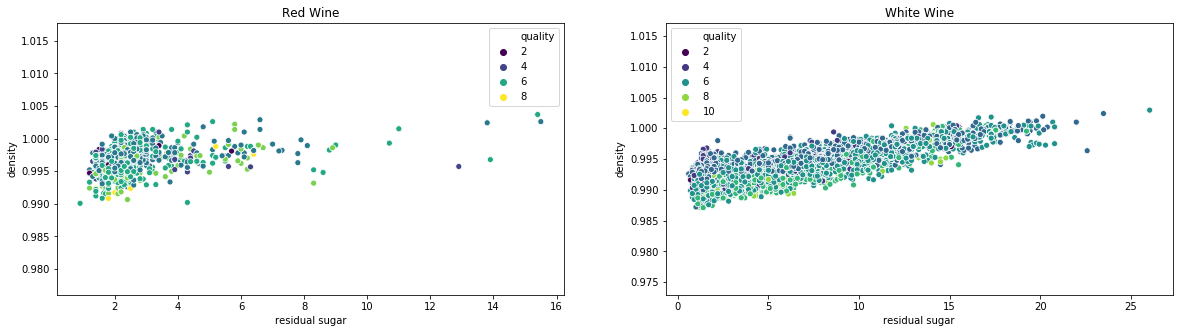

In [15]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.title('Red Wine')
sns.scatterplot(x=data_red['residual sugar'], y=data_red['density'], hue=data_red['quality'], palette="viridis" )

plt.subplot(1, 2, 2)
plt.title('White Wine')
sns.scatterplot(x=data_white['residual sugar'], y=data_white['density'], hue=data_white['quality'], palette="viridis" )


Negative correlation between "alcohol" and "density".

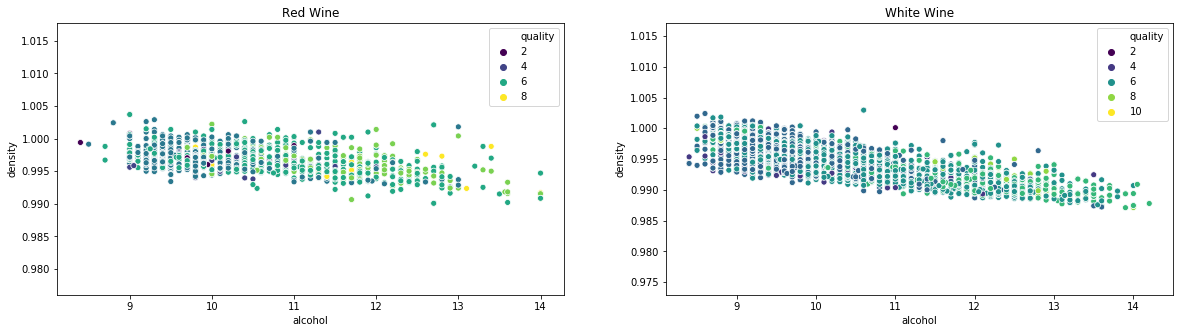

In [16]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.title('Red Wine')
sns.scatterplot(x=data_red['alcohol'], y=data_red['density'], hue=data_red['quality'], palette="viridis" )

plt.subplot(1, 2, 2)
plt.title('White Wine')
sns.scatterplot(x=data_white['alcohol'], y=data_white['density'], hue=data_white['quality'], palette="viridis" )

Although "fixed acidity" has a good correlation with some variables, excluding this feature from the model improves accuracy.

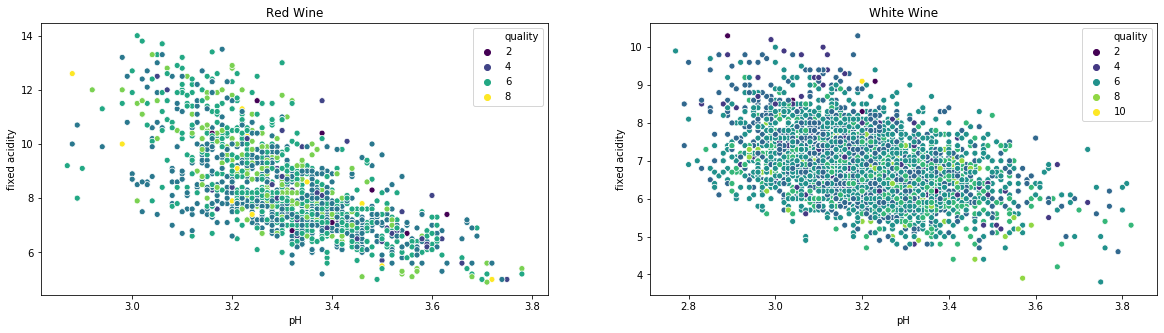

In [17]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.title('Red Wine')
sns.scatterplot(x=data_red['pH'], y=data_red['fixed acidity'], hue=data_red['quality'], palette="viridis" )

plt.subplot(1, 2, 2)
plt.title('White Wine')
sns.scatterplot(x=data_white['pH'], y=data_white['fixed acidity'], hue=data_white['quality'], palette="viridis" )

I like to plot boxplot to visualize the correlation between features and target variable in classifier problem, because I can see the data distribution in each class.

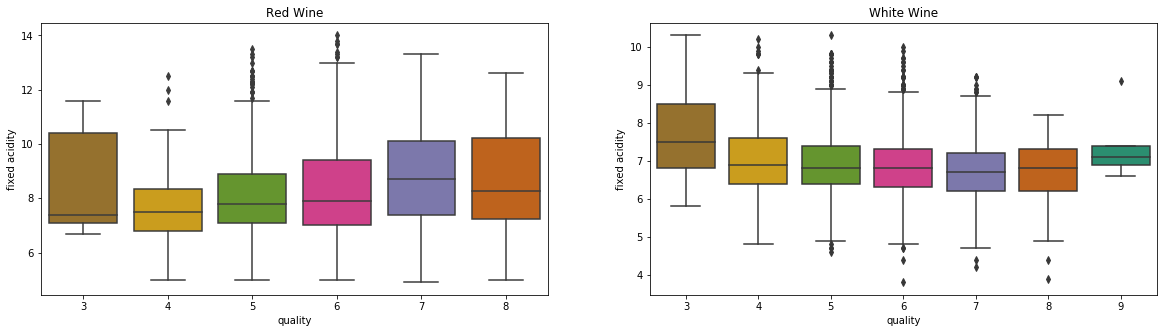

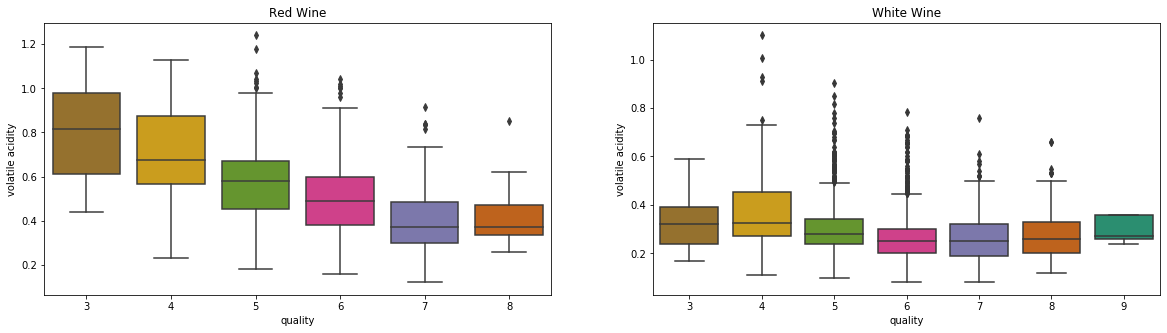

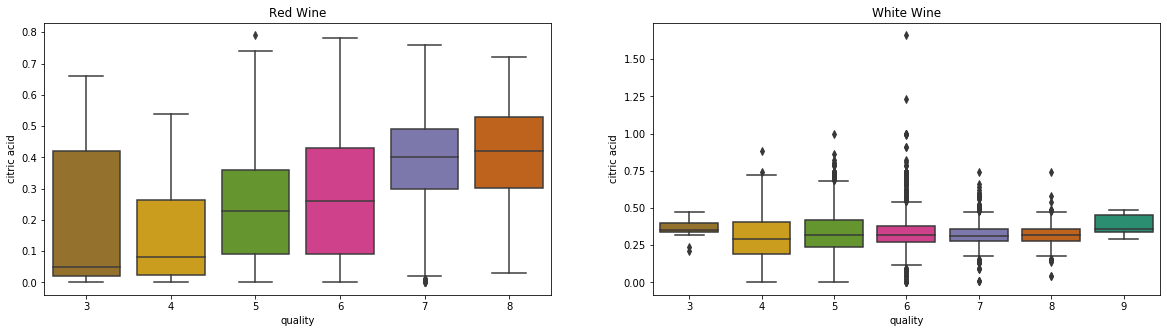

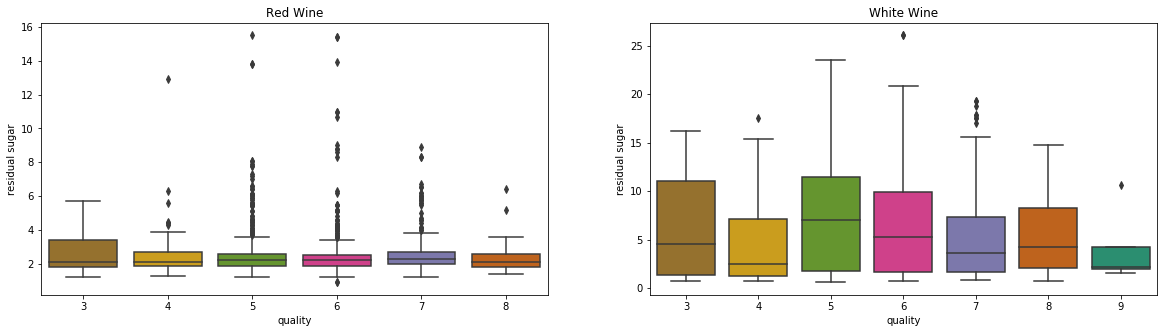

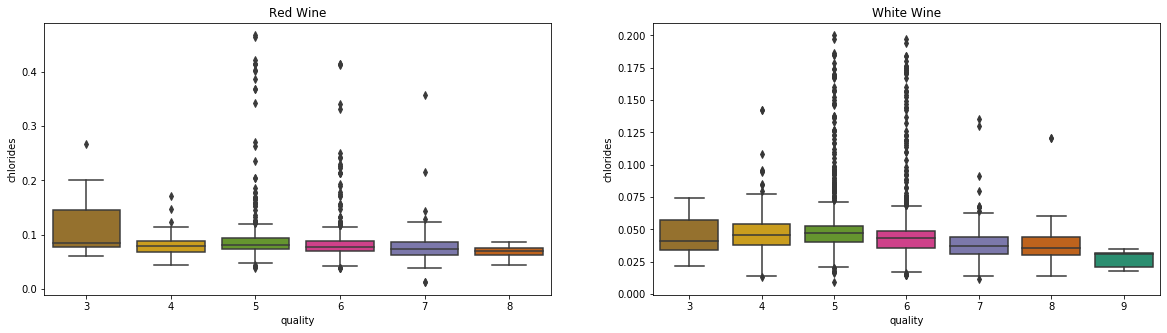

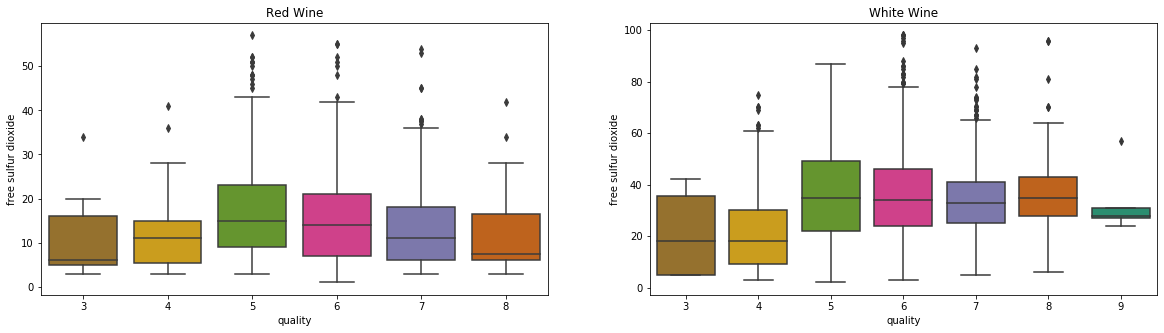

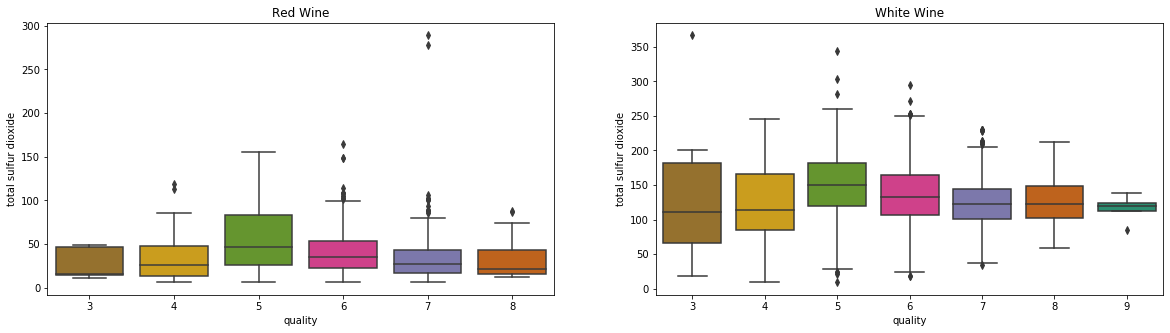

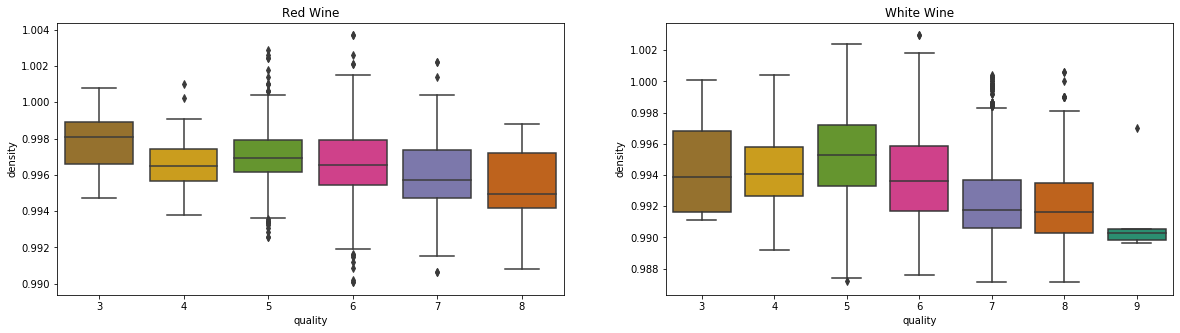

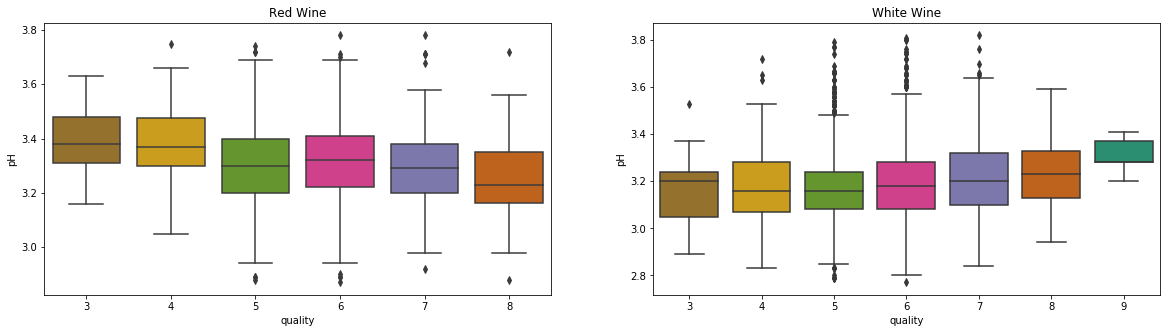

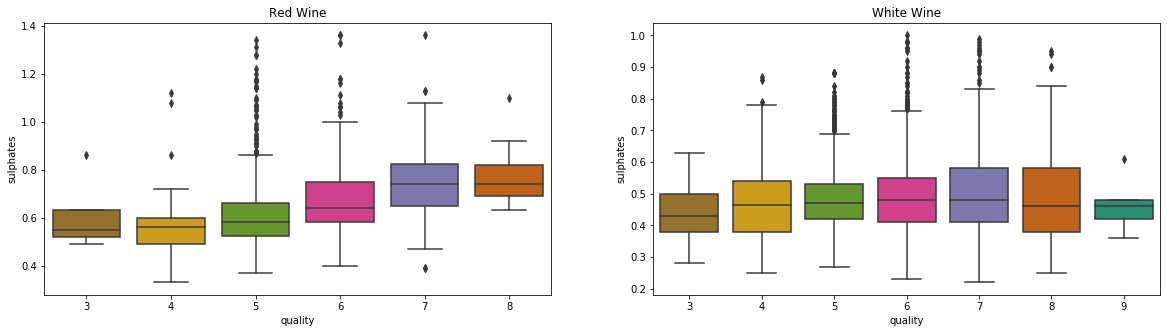

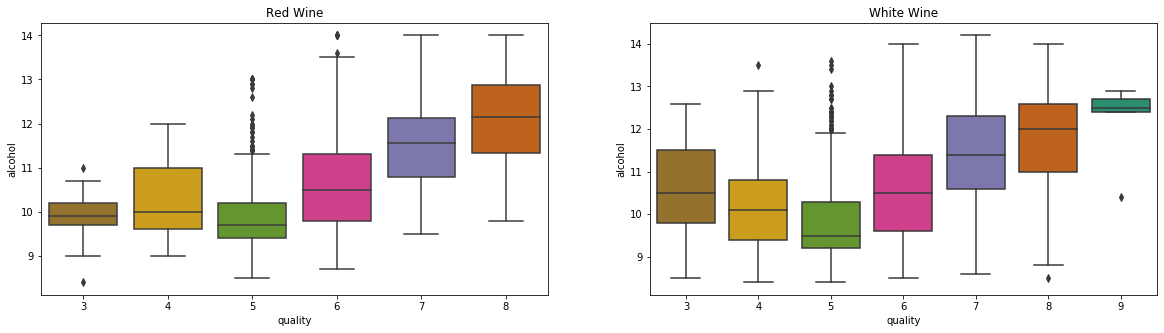

In [18]:
cols = data_red.columns.drop('quality')

for i, c in enumerate(cols):
  plt.figure(figsize=(20,5)) 
  plt.subplot(1, 2, 1)
  plt.title('Red Wine')
  sns.boxplot(data_red['quality'], data_red[c] ,palette="Dark2_r")

  plt.subplot(1, 2, 2)
  plt.title('White Wine')
  sns.boxplot(data_white['quality'], data_white[c] ,palette="Dark2_r")


### SVM and GridSearchCV

My first model is an SVM classifier. To choose the hyperparameter I use Pipeline and GridSearchCV. To normalize the data I use StandardScaler. That transform data to the same means and standard deviations. I tried other normalization, but not worked well. 

#### SVM Red Wine

In [0]:
features_del_red = ['fixed acidity', 'quality']

y = data_red.quality
X = data_red.drop( features_del_red, axis=1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.18, 
                                                    random_state=18, 
                                                    stratify=y)

In [0]:
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         SVC( ))

In [22]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'svc', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])

Here are defined the hyperparameters for training the model. I am commenting on the values used for testing because the execution takes time, so the best parameters for the algorithm are already defined.

In [0]:
#param_grid = {'svc__C': [1, 2, 2.5],
#             'svc__decision_function_shape': ['ovo', 'ovr'],
#             'svc__gamma': [ 1, 1.5, 1.8],
#             'svc__kernel': ['rbf', 'linear'],
#             'svc__shrinking': [True, False]
#}

param_grid = {'svc__C': [2],
            'svc__decision_function_shape': ['ovo'],
            'svc__gamma': [1.5],
            'svc__kernel': ['rbf'],
            'svc__shrinking': [True]
}

In [24]:
clf = GridSearchCV(pipeline, param_grid, cv=5)
 
# Fit and tune model
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            t

In [25]:
clf.best_params_

{'svc__C': 2,
 'svc__decision_function_shape': 'ovo',
 'svc__gamma': 1.5,
 'svc__kernel': 'rbf',
 'svc__shrinking': True}

In [0]:
pred = clf.predict(X_test)

In [27]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         9
           5       0.65      0.80      0.72       120
           6       0.63      0.65      0.64       114
           7       0.93      0.40      0.56        35
           8       0.00      0.00      0.00         3

    accuracy                           0.65       283
   macro avg       0.37      0.31      0.32       283
weighted avg       0.65      0.65      0.63       283



In [0]:
df_reports_red = pd.DataFrame(classification_report(y_test, pred, output_dict=True)).transpose()
df_reports_red.drop(['recall', 'f1-score', 'support'], axis=1, inplace=True)
df_reports_red.columns = ['SVM']

#### SVM White Wine

Now it's the time of the White Wine dataset. We need two models because the types of wines are very different.



In [0]:
features_del_white = ['fixed acidity', 'quality']

y = data_white.quality
X = data_white.drop( features_del_white, axis=1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.18,
                                                    random_state=18,
                                                    stratify=y)

In [0]:
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         SVC( ))

In [32]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'svc', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])

In [0]:
param_grid = {'svc__C': [2.5],
              'svc__decision_function_shape': ['ovo'],
              'svc__gamma': [1.8],
              'svc__kernel': ['rbf'],
              'svc__shrinking': [True]
 }

In [34]:
clf = GridSearchCV(pipeline, param_grid, cv=5)
 
# Fit and tune model
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            t

In [35]:
clf.best_params_

{'svc__C': 2.5,
 'svc__decision_function_shape': 'ovo',
 'svc__gamma': 1.8,
 'svc__kernel': 'rbf',
 'svc__shrinking': True}

In [0]:
pred = clf.predict(X_test)

In [37]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.75      0.21      0.32        29
           5       0.81      0.52      0.63       260
           6       0.59      0.88      0.70       392
           7       0.77      0.49      0.60       158
           8       0.93      0.42      0.58        31
           9       0.00      0.00      0.00         1

    accuracy                           0.66       873
   macro avg       0.55      0.36      0.40       873
weighted avg       0.70      0.66      0.64       873



In [0]:
df_reports_white = pd.DataFrame(classification_report(y_test, pred, output_dict=True)).transpose()
df_reports_white.drop(['recall', 'f1-score', 'support'], axis=1, inplace=True)
df_reports_white.columns = ['SVM']

### XGBClassifier Red WIne

This algorithm is also a great classifier and I will use GridSearchCV and Pipeline to find the best hyperparameters in the model, and StandardScaler to normalize data. 

In [0]:
features_del_red = ['fixed acidity', 'quality']

y = data_red.quality
X = data_red.drop( features_del_red, axis=1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.18, 
                                                    random_state=18, 
                                                    stratify=y)

In [0]:
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         XGBClassifier())

In [42]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'xgbclassifier', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'xgbclassifier__base_score', 'xgbclassifier__booster', 'xgbclassifier__colsample_bylevel', 'xgbclassifier__colsample_bynode', 'xgbclassifier__colsample_bytree', 'xgbclassifier__gamma', 'xgbclassifier__learning_rate', 'xgbclassifier__max_delta_step', 'xgbclassifier__max_depth', 'xgbclassifier__min_child_weight', 'xgbclassifier__missing', 'xgbclassifier__n_estimators', 'xgbclassifier__n_jobs', 'xgbclassifier__nthread', 'xgbclassifier__objective', 'xgbclassifier__random_state', 'xgbclassifier__reg_alpha', 'xgbclassifier__reg_lambda', 'xgbclassifier__scale_pos_weight', 'xgbclassifier__seed', 'xgbclassifier__silent', 'xgbclassifier__subsample', 'xgbclassifier__verbosity'])

In [0]:
params = {
        'xgbclassifier__min_child_weight': [0.1],
        'xgbclassifier__gamma': [0.5],
        'xgbclassifier__subsample': [0.8],
        'xgbclassifier__colsample_bytree': [0.5],
        'xgbclassifier__max_depth': [10],
        'xgbclassifier__n_estimators': [250],
        'xgbclassifier__learning_rate': [0.01]
        }

In [44]:
clf = GridSearchCV(pipeline, params, cv=5)
 
# Fit and tune model
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      gamma=0,
                                                      learning_rate=0.1,
                                                      max_delta_step=0,
                      

In [45]:
clf.best_params_

{'xgbclassifier__colsample_bytree': 0.5,
 'xgbclassifier__gamma': 0.5,
 'xgbclassifier__learning_rate': 0.01,
 'xgbclassifier__max_depth': 10,
 'xgbclassifier__min_child_weight': 0.1,
 'xgbclassifier__n_estimators': 250,
 'xgbclassifier__subsample': 0.8}

In [0]:
y_pred = clf.predict(X_test)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         9
           5       0.77      0.86      0.81       120
           6       0.73      0.77      0.75       114
           7       0.79      0.63      0.70        35
           8       0.00      0.00      0.00         3

    accuracy                           0.75       283
   macro avg       0.38      0.38      0.38       283
weighted avg       0.72      0.75      0.73       283



In [0]:
df_reports_red['XGBClassifier'] = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()['precision']

### XGBClassifier White Wine

In [0]:
features_del_white = ['fixed acidity', 'quality']

y = data_white.quality
X = data_white.drop( features_del_white, axis=1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.18, 
                                                    random_state=18, 
                                                    stratify=y)

In [0]:
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         XGBClassifier())

In [52]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'xgbclassifier', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'xgbclassifier__base_score', 'xgbclassifier__booster', 'xgbclassifier__colsample_bylevel', 'xgbclassifier__colsample_bynode', 'xgbclassifier__colsample_bytree', 'xgbclassifier__gamma', 'xgbclassifier__learning_rate', 'xgbclassifier__max_delta_step', 'xgbclassifier__max_depth', 'xgbclassifier__min_child_weight', 'xgbclassifier__missing', 'xgbclassifier__n_estimators', 'xgbclassifier__n_jobs', 'xgbclassifier__nthread', 'xgbclassifier__objective', 'xgbclassifier__random_state', 'xgbclassifier__reg_alpha', 'xgbclassifier__reg_lambda', 'xgbclassifier__scale_pos_weight', 'xgbclassifier__seed', 'xgbclassifier__silent', 'xgbclassifier__subsample', 'xgbclassifier__verbosity'])

In [0]:
params = {
        'xgbclassifier__min_child_weight': [0.5],
        'xgbclassifier__gamma': [0.5],
        'xgbclassifier__subsample': [0.8],
        'xgbclassifier__colsample_bytree': [0.5],
        'xgbclassifier__max_depth': [10],
        'xgbclassifier__n_estimators': [200],
        'xgbclassifier__learning_rate': [0.05]
        }

In [54]:
clf = GridSearchCV(pipeline, params, cv=5)
 
# Fit and tune model
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      gamma=0,
                                                      learning_rate=0.1,
                                                      max_delta_step=0,
                      

In [55]:
clf.best_params_

{'xgbclassifier__colsample_bytree': 0.5,
 'xgbclassifier__gamma': 0.5,
 'xgbclassifier__learning_rate': 0.05,
 'xgbclassifier__max_depth': 10,
 'xgbclassifier__min_child_weight': 0.5,
 'xgbclassifier__n_estimators': 200,
 'xgbclassifier__subsample': 0.8}

In [0]:
y_pred = clf.predict(X_test)

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.90      0.31      0.46        29
           5       0.74      0.70      0.72       260
           6       0.66      0.79      0.72       392
           7       0.71      0.58      0.64       158
           8       0.93      0.45      0.61        31
           9       0.00      0.00      0.00         1

    accuracy                           0.70       873
   macro avg       0.56      0.41      0.45       873
weighted avg       0.71      0.70      0.69       873



In [0]:
df_reports_white['XGBClassifier'] = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()['precision']

### Neural Network Red Wine

I used a simple network with only one hidden layer. This sets up a multivariate classifier that captures all features. In tests, the increase in the depth of the network was decrease the performance of the model.

In [0]:
features_del_red = ['fixed acidity', 'quality']

y = data_red.quality
X = data_red.drop( features_del_white, axis=1)

y = pd.get_dummies(y)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.18, 
                                                    random_state=42, 
                                                    stratify=y)

In [0]:
scaler = preprocessing.StandardScaler().fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=6, activation='relu', input_shape=(X_train.shape[1], )))
model.add(tf.keras.layers.Dense(units=y_train.shape[1], activation='softmax'))

model.compile(optimizer ='adam', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, 
                         y_train, 
                         epochs=65, 
                         verbose=0,
                         validation_data=(X_test, y_test)
                         )

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [63]:
model.evaluate(X_test, y_test)

283/283 [==============================] - 0s 47us/sample - loss: 0.9680 - acc: 0.6007


[0.9679530610465329, 0.6007067]

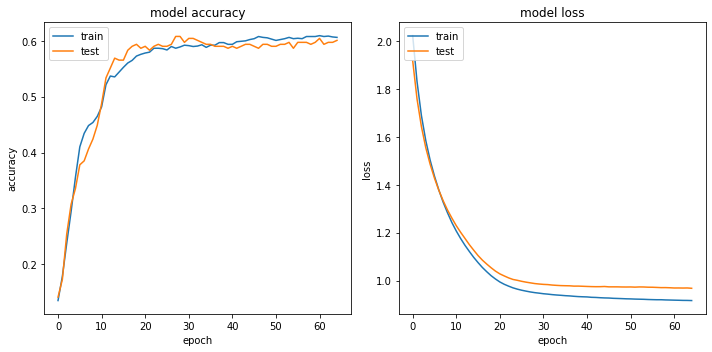

In [64]:
plotLearningCurves(history)

In [0]:
y_pred = model.predict_classes(X_test) + 3

In [66]:
print(classification_report( y_test.idxmax(axis=1) , y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         9
           5       0.64      0.77      0.70       120
           6       0.56      0.58      0.57       114
           7       0.55      0.34      0.42        35
           8       0.00      0.00      0.00         3

    accuracy                           0.60       283
   macro avg       0.29      0.28      0.28       283
weighted avg       0.57      0.60      0.58       283



In [0]:
df_reports_red['Neural_Network'] = pd.DataFrame(classification_report( y_test.idxmax(axis=1) , y_pred, output_dict=True)).transpose()['precision']

### Neural Network White Wine

In [0]:
features_del_white = ['fixed acidity', 'quality']

y = data_white.quality
X = data_white.drop( features_del_white, axis=1)

y = pd.get_dummies(y)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.18, 
                                                    random_state=42, 
                                                    stratify=y)

In [0]:
scaler = preprocessing.StandardScaler().fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=12, activation='relu', input_shape=(X_train.shape[1], )))
model.add(tf.keras.layers.Dense(units=y_train.shape[1], activation='softmax'))

model.compile(optimizer ='adam', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, 
                         y_train, 
                         epochs=65, 
                         verbose=0,
                         validation_data=(X_test, y_test)
                         )

In [72]:
model.evaluate(X_test, y_test)

873/873 [==============================] - 0s 24us/sample - loss: 1.0571 - acc: 0.5544


[1.0571140000364079, 0.5544101]

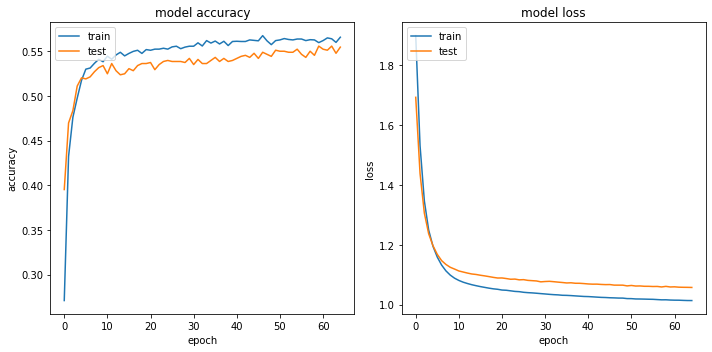

In [73]:
plotLearningCurves(history)

In [0]:
y_pred = model.predict_classes(X_test) + 3

In [75]:
print(classification_report( y_test.idxmax(axis=1) , y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.43      0.10      0.17        29
           5       0.58      0.56      0.57       260
           6       0.54      0.69      0.61       392
           7       0.56      0.40      0.46       158
           8       0.00      0.00      0.00        31
           9       0.00      0.00      0.00         1

    accuracy                           0.55       873
   macro avg       0.30      0.25      0.26       873
weighted avg       0.53      0.55      0.53       873



In [0]:
df_reports_white['Neural_Network'] = pd.DataFrame(classification_report(y_test.idxmax(axis=1) , y_pred, output_dict=True)).transpose()['precision']

### Random Forest Red Wine

This is also a great classifier algorithm. The process for selecting hyperparameters is the same as for other models.

In [0]:
features_del_red = ['fixed acidity', 'quality']

y = data_red.quality
X = data_red.drop( features_del_red, axis=1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.18, 
                                                    random_state=18, 
                                                    stratify=y)

In [0]:
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestClassifier(n_estimators=100))

In [80]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'randomforestclassifier', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'randomforestclassifier__bootstrap', 'randomforestclassifier__ccp_alpha', 'randomforestclassifier__class_weight', 'randomforestclassifier__criterion', 'randomforestclassifier__max_depth', 'randomforestclassifier__max_features', 'randomforestclassifier__max_leaf_nodes', 'randomforestclassifier__max_samples', 'randomforestclassifier__min_impurity_decrease', 'randomforestclassifier__min_impurity_split', 'randomforestclassifier__min_samples_leaf', 'randomforestclassifier__min_samples_split', 'randomforestclassifier__min_weight_fraction_leaf', 'randomforestclassifier__n_estimators', 'randomforestclassifier__n_jobs', 'randomforestclassifier__oob_score', 'randomforestclassifier__random_state', 'randomforestclassifier__verbose', 'randomforestclassifier__warm_start'])

In [0]:
hyperparameters = { 'randomforestclassifier__max_depth': [None],
                   'randomforestclassifier__max_features' : ['log2'],
                   'randomforestclassifier__n_estimators': [100]
                  }

In [82]:
clf = GridSearchCV(pipeline, hyperparameters, cv=5)
 
# Fit and tune model
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                   

In [83]:
clf.best_params_

{'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'log2',
 'randomforestclassifier__n_estimators': 100}

In [0]:
y_pred = clf.predict(X_test)

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         9
           5       0.73      0.84      0.78       120
           6       0.68      0.69      0.69       114
           7       0.78      0.60      0.68        35
           8       0.00      0.00      0.00         3

    accuracy                           0.71       283
   macro avg       0.36      0.36      0.36       283
weighted avg       0.68      0.71      0.69       283



In [0]:
df_reports_red['Random_Forest'] = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()['precision']

### Random Forest White Wine

In [0]:
features_del = ['fixed acidity', 'quality']

y = data_white.quality
X = data_white.drop( features_del, axis=1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.18, 
                                                    random_state=18, 
                                                    stratify=y)

In [0]:
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestClassifier(n_estimators=100))

In [90]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'randomforestclassifier', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'randomforestclassifier__bootstrap', 'randomforestclassifier__ccp_alpha', 'randomforestclassifier__class_weight', 'randomforestclassifier__criterion', 'randomforestclassifier__max_depth', 'randomforestclassifier__max_features', 'randomforestclassifier__max_leaf_nodes', 'randomforestclassifier__max_samples', 'randomforestclassifier__min_impurity_decrease', 'randomforestclassifier__min_impurity_split', 'randomforestclassifier__min_samples_leaf', 'randomforestclassifier__min_samples_split', 'randomforestclassifier__min_weight_fraction_leaf', 'randomforestclassifier__n_estimators', 'randomforestclassifier__n_jobs', 'randomforestclassifier__oob_score', 'randomforestclassifier__random_state', 'randomforestclassifier__verbose', 'randomforestclassifier__warm_start'])

In [0]:
hyperparameters = { 'randomforestclassifier__max_depth': [100],
                   'randomforestclassifier__max_features' : ['log2'],
                   'randomforestclassifier__n_estimators': [100]
                  }

In [92]:
clf = GridSearchCV(pipeline, hyperparameters, cv=5)
 
# Fit and tune model
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                   

In [93]:
clf.best_params_

{'randomforestclassifier__max_depth': 100,
 'randomforestclassifier__max_features': 'log2',
 'randomforestclassifier__n_estimators': 100}

In [0]:
y_pred = clf.predict(X_test)

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.88      0.24      0.38        29
           5       0.72      0.72      0.72       260
           6       0.66      0.79      0.72       392
           7       0.76      0.59      0.67       158
           8       0.93      0.45      0.61        31
           9       0.00      0.00      0.00         1

    accuracy                           0.70       873
   macro avg       0.57      0.40      0.44       873
weighted avg       0.71      0.70      0.69       873



In [0]:
df_reports_white['Random_Forest'] = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()['precision']

### Conclusion

The best result obtained in paper Cortez et al., 2009 was described as follows:


> When admitting only the correct classified classes (T = 0:5), the overall accuracies are 62.4% (red) and 64.6% (white). It should be noted that the datasets contain six/seven classes (from 3 to 8/9). These accuracies are much better than the ones expected by a random classifier. The performance is substantially improved when the tolerance is set to accept responses that are correct within the one of the two nearest classes (T = 1:0), obtaining a global accuracy of 89.0% (red) and 86.8% (white). In particular, for both tasks the majority of the classes present an individual accuracy (precision) higher than 90%.

Table 3 summarizes these results:


![Table Accuracy Paper Cortez et al., 2009](https://github.com/rrpronaldo/Portfolio-Data_Science/blob/master/Cortez_et_al_2009_-_Table_3.JPG?raw=true)

I add the results of the paper to the DataFrame of reports from my models to compare how each one performed.

In [0]:
df_reports_red.drop(['macro avg', 'weighted avg'], inplace=True)
df_reports_white.drop(['macro avg', 'weighted avg'], inplace=True)

df_reports_red['Paper_Cortez'] = [0.000, 0.200, 0.675, 0.577, 0.586, 0.000 , 
                           0.624]

df_reports_white['Paper_Cortez'] = [ 0.000, 0.633, 0.726, 0.603, 0.678, 0.855, 0.000, 
                             0.646]

For Red Wine:

  The model proposed by Cortez et al., 2009 reached an overall accuracy of 62.4%. The proposed SVM model improved this accuracy to 65.01%. XGBClassifier achieved an excellent result with 75.2% accuracy. The Neural Network did not perform well with only 60.1% accuracy. Finally, Random Forest Classifier also had a great result with 71.0% accuracy.

  For White Wine:

  The model by Cortez et al., 2009 performed with an accuracy of 64.6%. I achieved a small improvement in the SVM model to 65.7%. In the XGBClassifier model, I obtained 69.7% accuracy. The neural network again performed worse with 55.4% accuracy. And Random Forest Classifier achieved the best performance with 69.9% accuracy, improving the original model by 5.3%.

  Therefore, I achieved the objective of improving the model by Cortez et al., 2009 for the two datasets in 3 of the 4 models proposed, reaching a maximum accuracy of 75% for Red Wine and 69.9% for White Wine.

Why don't the models perform better than that?
> I would like the model to have an accuracy greater than 80% to consider acceptable. However, as the target variable is classified by human tasters, there is a bias in each taster, as each can classify the same wine differently, making it much more difficult to achieve much greater accuracy.

What can still be done?
*   The neural network has a great power, so it can still be better explored to try to improve performance.
*   Change the tolerance to accept responses that are correct within the one of the two nearest classes, this can reduce the sensory bias of human tasters.


Finally, if this notebook was useful or there are any suggestions I appreciate any feedback.

In [98]:
df_reports_red

SVM  XGBClassifier  Neural_Network  Random_Forest  Paper_Cortez
3         0.000000       0.000000        0.000000       0.000000         0.000
4         0.000000       0.000000        0.000000       0.000000         0.200
5         0.648649       0.768657        0.643357       0.726619         0.675
6         0.632479       0.727273        0.559322       0.681034         0.577
7         0.933333       0.785714        0.545455       0.777778         0.586
8         0.000000       0.000000        0.000000       0.000000         0.000
accuracy  0.650177       0.752650        0.600707       0.710247         0.624

In [99]:
df_reports_white

SVM  XGBClassifier  Neural_Network  Random_Forest  Paper_Cortez
3         0.000000       0.000000        0.000000       0.000000         0.000
4         0.750000       0.900000        0.428571       0.875000         0.633
5         0.807229       0.743902        0.577075       0.724806         0.726
6         0.588034       0.657505        0.544000       0.658849         0.603
7         0.770000       0.713178        0.557522       0.764228         0.678
8         0.928571       0.933333        0.000000       0.933333         0.855
9         0.000000       0.000000        0.000000       0.000000         0.000
accuracy  0.657503       0.697595        0.554410       0.699885         0.646